In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ue21cs342aa2/sample_submission.csv
/kaggle/input/ue21cs342aa2/train.csv
/kaggle/input/ue21cs342aa2/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/ue21cs342aa2/train.csv")
test_data = pd.read_csv("/kaggle/input/ue21cs342aa2/test.csv")

In [3]:
train_data.head()

,id,Date,Open,Close,Volume,Strategy
0,0,2015-06-01,66.208486,75.609978,298506300,Hold
1,1,2015-06-08,64.116235,74.443331,227974800,Hold
2,2,2015-06-15,47.701942,71.140831,250670900,Buy
3,3,2015-06-22,54.754816,72.881344,223614300,Hold
4,4,2015-06-29,48.031899,66.284718,406814900,Buy


In [4]:
test_data.head()

,id,Date,Open,Volume
0,0,2021-03-01,72.708331,205897600
1,1,2021-03-08,73.310886,214095600
2,2,2021-03-15,70.610119,151601700
3,3,2021-03-22,70.256017,193982500
4,4,2021-03-29,68.258324,220238400


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        300 non-null    int64  
 1   Date      300 non-null    object 
 2   Open      300 non-null    float64
 3   Close     300 non-null    float64
 4   Volume    300 non-null    int64  
 5   Strategy  300 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 14.2+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    int64  
 1   Date    100 non-null    object 
 2   Open    100 non-null    float64
 3   Volume  100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ KB


In [7]:
train_data.describe()

,id,Open,Close,Volume
count,300.000000,300.000000,300.000000,3.000000e+02
mean,149.500000,75.977813,79.430489,1.866300e+08
std,86.746758,16.158343,13.878395,7.952792e+07
min,0.000000,40.269435,47.979353,5.991330e+07
25%,74.750000,64.872395,69.689227,1.324862e+08
50%,149.500000,79.805683,82.991900,1.715536e+08
75%,224.250000,88.342927,89.719145,2.201842e+08
max,299.000000,102.558322,103.119373,6.935702e+08


In [8]:
test_data.describe()

,id,Open,Volume
count,100.000000,100.000000,1.000000e+02
mean,49.500000,70.265016,1.975365e+08
std,29.011492,9.010469,5.856774e+07
min,0.000000,51.825792,6.182620e+07
25%,24.750000,63.318829,1.584331e+08
50%,49.500000,71.470649,1.928077e+08
75%,74.250000,77.451497,2.263687e+08
max,99.000000,89.752238,4.508312e+08


In [9]:
#Convert date to datetime format and set to index
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace = True)

In [10]:
test_data['Date'] = pd.to_datetime(test_data['Date'])

In [11]:
train_data.dtypes

id            int64
Open        float64
Close       float64
Volume        int64
Strategy     object
dtype: object

## Handle Missing Values

In [12]:
train_data.isnull().sum()

id          0
Open        0
Close       0
Volume      0
Strategy    0
dtype: int64

In [13]:
#Checking for empty strings in the Strategy column.
train_data['Strategy'].str.strip().eq('').sum()

0

In [14]:
#Checking for placeholder values in the dataset.
(train_data['Open'] == -1).sum()
(train_data['Close'] == 9999).sum()
(train_data['Volume'] == -1).sum()

0

We therefore conclude that there are no missing values of any type in the dataset.

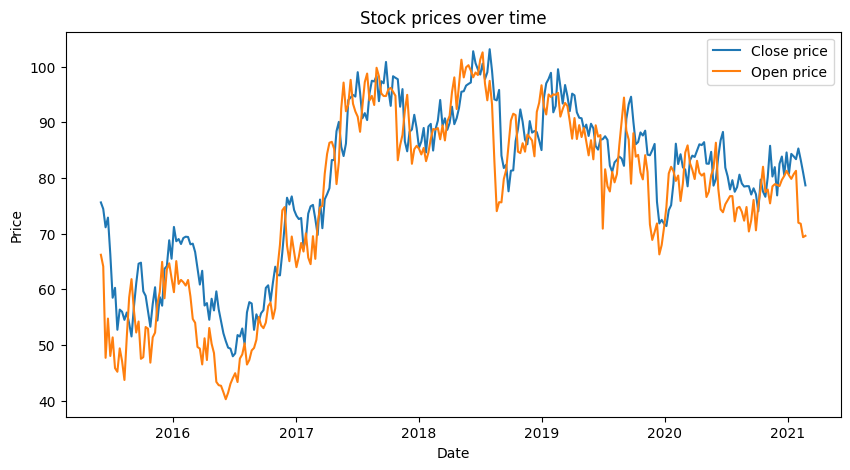

In [15]:
import matplotlib.pyplot as plt
#Time series plots for Open and Close prices
plt.figure(figsize = (10, 5))
plt.plot(train_data['Close'], label = 'Close price' )
plt.plot(train_data['Open'], label = 'Open price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock prices over time')
plt.legend()
plt.show()

From the above graph, we can say that both Open and Close prices have a long-term trend with Cyclic, Seasonal and Random Variations/Movements.

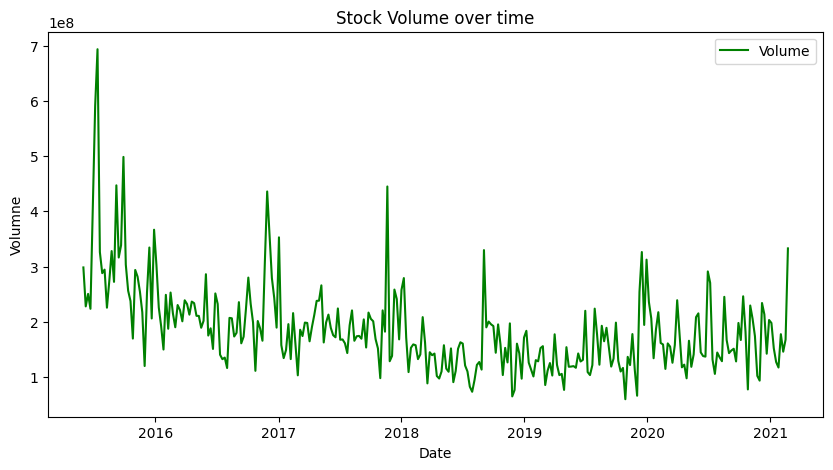

In [16]:
#Volume trends
plt.figure(figsize = (10, 5))
plt.plot(train_data['Volume'], label = 'Volume', color = 'green')
plt.xlabel('Date')
plt.ylabel('Volumne')
plt.title('Stock Volume over time')
plt.legend()
plt.show()

Volume shows a downward trend over time

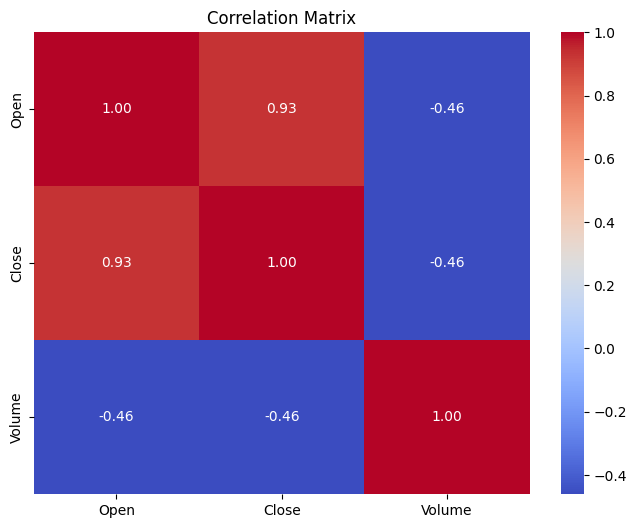

In [17]:
import seaborn as sns
# Compute the correlation matrix
correlation_matrix = train_data[['Open', 'Close', 'Volume']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Open and Close prices show positive correlation with each other with a correlation coefficient of 0.93. Whereas both Open and Close prices show negative correlation with Volume with a correlation coefficient of -0.46 each

In [18]:
# This test is to see, how many lags on each attribute has how much impact on the target variable
from statsmodels.tsa.stattools import grangercausalitytests
max_lag = 3
test_result_open = grangercausalitytests(train_data[['Open', 'Close']], max_lag, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0193  , p=0.0459  , df_denom=296, df_num=1
ssr based chi2 test:   chi2=4.0601  , p=0.0439  , df=1
likelihood ratio test: chi2=4.0327  , p=0.0446  , df=1
parameter F test:         F=4.0193  , p=0.0459  , df_denom=296, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8176  , p=0.4425  , df_denom=293, df_num=2
ssr based chi2 test:   chi2=1.6632  , p=0.4354  , df=2
likelihood ratio test: chi2=1.6586  , p=0.4364  , df=2
parameter F test:         F=0.8176  , p=0.4425  , df_denom=293, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0297  , p=0.3797  , df_denom=290, df_num=3
ssr based chi2 test:   chi2=3.1638  , p=0.3671  , df=3
likelihood ratio test: chi2=3.1471  , p=0.3695  , df=3
parameter F test:         F=1.0297  , p=0.3797  , df_denom=290, df_num=3


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


According to the results above, we see that Open prices with only lag 1 have p values less than 0.05. This shows that these values have a high impact on the target variable. Hence we choose to find only 1 lag values for Open prices to train our model.

In [19]:
test_result_volume = grangercausalitytests(train_data[['Volume', 'Close']], max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=18.7137 , p=0.0000  , df_denom=296, df_num=1
ssr based chi2 test:   chi2=18.9034 , p=0.0000  , df=1
likelihood ratio test: chi2=18.3299 , p=0.0000  , df=1
parameter F test:         F=18.7137 , p=0.0000  , df_denom=296, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.7679  , p=0.0005  , df_denom=293, df_num=2
ssr based chi2 test:   chi2=15.8008 , p=0.0004  , df=2
likelihood ratio test: chi2=15.3962 , p=0.0005  , df=2
parameter F test:         F=7.7679  , p=0.0005  , df_denom=293, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.6797  , p=0.0125  , df_denom=290, df_num=3
ssr based chi2 test:   chi2=11.3055 , p=0.0102  , df=3
likelihood ratio test: chi2=11.0957 , p=0.0112  , df=3
parameter F test:         F=3.6797  , p=0.0125  , df_denom=290, df_num=3


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


According to these results, Volume with lags 1 and 2 have p values close to 0. Hence we decide to find lag 1 and 2 values of Volume to train our model

## Feature engineering

In [20]:
#EMA
train_data['Open_EMA'] = train_data['Open'].ewm(span = 7, adjust = False).mean()
train_data['Volume_EMA'] = train_data['Volume'].ewm(span = 7, adjust = False).mean()

In [21]:
#Lagged features

# Find only 1 lag value for Open prices as per above observations.
train_data[f'Open_Lag_1'] = train_data['Open'].shift(1)
train_data[f'Open_Lag_1'] = train_data[f'Open_Lag_1'].fillna(method='bfill')

# Find lag 1 and 2 for Volume according to the results given above.

train_data[f'Volume_Lag_1'] = train_data['Volume'].shift(1)
train_data[f'Volume_Lag_1'] = train_data[f'Volume_Lag_1'].fillna(method='bfill')


In [22]:
train_data

,id,Open,Close,Volume,Strategy,Open_EMA,Volume_EMA,Open_Lag_1,Volume_Lag_1
Date,,,,,,,,,
2015-06-01,0,66.208486,75.609978,298506300,Hold,66.208486,2.985063e+08,66.208486,298506300.0
2015-06-08,1,64.116235,74.443331,227974800,Hold,65.685423,2.808734e+08,66.208486,298506300.0
2015-06-15,2,47.701942,71.140831,250670900,Buy,61.189553,2.733228e+08,64.116235,227974800.0
2015-06-22,3,54.754816,72.881344,223614300,Hold,59.580869,2.608957e+08,47.701942,250670900.0
2015-06-29,4,48.031899,66.284718,406814900,Buy,56.693626,2.973755e+08,54.754816,223614300.0
...,...,...,...,...,...,...,...,...,...
2021-01-25,295,81.284821,83.373498,117281600,Sell,80.318683,1.517246e+08,80.663736,127248000.0
2021-02-01,296,71.970249,85.294903,177655800,Sell,78.231575,1.582074e+08,81.284821,117281600.0
2021-02-08,297,71.784627,83.266453,146003500,Hold,76.619838,1.551564e+08,71.970249,177655800.0


In [23]:
train_data['Open_rolling_mean'] = train_data['Open'].rolling(window=5).std()
train_data['Open_rolling_mean'] = train_data['Open'].fillna(method='bfill',limit=4)

In [24]:
train_data

,id,Open,Close,Volume,Strategy,Open_EMA,Volume_EMA,Open_Lag_1,Volume_Lag_1,Open_rolling_mean
Date,,,,,,,,,,
2015-06-01,0,66.208486,75.609978,298506300,Hold,66.208486,2.985063e+08,66.208486,298506300.0,66.208486
2015-06-08,1,64.116235,74.443331,227974800,Hold,65.685423,2.808734e+08,66.208486,298506300.0,64.116235
2015-06-15,2,47.701942,71.140831,250670900,Buy,61.189553,2.733228e+08,64.116235,227974800.0,47.701942
2015-06-22,3,54.754816,72.881344,223614300,Hold,59.580869,2.608957e+08,47.701942,250670900.0,54.754816
2015-06-29,4,48.031899,66.284718,406814900,Buy,56.693626,2.973755e+08,54.754816,223614300.0,48.031899
...,...,...,...,...,...,...,...,...,...,...
2021-01-25,295,81.284821,83.373498,117281600,Sell,80.318683,1.517246e+08,80.663736,127248000.0,81.284821
2021-02-01,296,71.970249,85.294903,177655800,Sell,78.231575,1.582074e+08,81.284821,117281600.0,71.970249
2021-02-08,297,71.784627,83.266453,146003500,Hold,76.619838,1.551564e+08,71.970249,177655800.0,71.784627


In [25]:
train_data['Open_diff'] = train_data['Open'].diff()
train_data.at[train_data.index[0],'Open_diff'] = train_data['Open'][0]
train_data['Volume_diff'] = train_data['Volume'].diff()
train_data.at[train_data.index[0],'Volume_diff'] = train_data['Volume'][0]

In [26]:
train_data

,id,Open,Close,Volume,Strategy,Open_EMA,Volume_EMA,Open_Lag_1,Volume_Lag_1,Open_rolling_mean,Open_diff,Volume_diff
Date,,,,,,,,,,,,
2015-06-01,0,66.208486,75.609978,298506300,Hold,66.208486,2.985063e+08,66.208486,298506300.0,66.208486,66.208486,298506300.0
2015-06-08,1,64.116235,74.443331,227974800,Hold,65.685423,2.808734e+08,66.208486,298506300.0,64.116235,-2.092251,-70531500.0
2015-06-15,2,47.701942,71.140831,250670900,Buy,61.189553,2.733228e+08,64.116235,227974800.0,47.701942,-16.414294,22696100.0
2015-06-22,3,54.754816,72.881344,223614300,Hold,59.580869,2.608957e+08,47.701942,250670900.0,54.754816,7.052875,-27056600.0
2015-06-29,4,48.031899,66.284718,406814900,Buy,56.693626,2.973755e+08,54.754816,223614300.0,48.031899,-6.722917,183200600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,295,81.284821,83.373498,117281600,Sell,80.318683,1.517246e+08,80.663736,127248000.0,81.284821,0.621085,-9966400.0
2021-02-01,296,71.970249,85.294903,177655800,Sell,78.231575,1.582074e+08,81.284821,117281600.0,71.970249,-9.314572,60374200.0
2021-02-08,297,71.784627,83.266453,146003500,Hold,76.619838,1.551564e+08,71.970249,177655800.0,71.784627,-0.185622,-31652300.0


## Splitting data

In [27]:
features = train_data[['Open',  'Open_diff', 'Open_EMA', 'Open_rolling_mean']]
target = train_data['Close']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle = False, random_state=42)

In [29]:
X_train

,Open,Open_diff,Open_EMA,Open_rolling_mean
Date,,,,
2015-06-01,66.208486,66.208486,66.208486,66.208486
2015-06-08,64.116235,-2.092251,65.685423,64.116235
2015-06-15,47.701942,-16.414294,61.189553,47.701942
2015-06-22,54.754816,7.052875,59.580869,54.754816
2015-06-29,48.031899,-6.722917,56.693626,48.031899
...,...,...,...,...
2019-12-02,70.289227,1.416088,75.445122,70.289227
2019-12-09,71.841477,1.552250,74.544211,71.841477
2019-12-16,66.278431,-5.563046,72.477766,66.278431


## Model fitting and Hyperparameter tuning

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p, d, q, P, D, Q, s = 0, 0, 1, 0, 1, 1, 12

initial_model = SARIMAX(train_data['Close'], order = (p, d, q), seasonal_order = (P, D, Q, s))
initial_results = initial_model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.21193D+00    |proj g|=  1.68552D-01

At iterate    5    f=  3.10127D+00    |proj g|=  4.58694D-02

At iterate   10    f=  3.09252D+00    |proj g|=  1.04055D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     12      1     0     0   7.228D-07   3.093D+00
  F =   3.0925209553094075     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [31]:
# import itertools

# p_values = [0, 1, 2]
# d_values = [0, 1]
# q_values = [0, 1, 2]
# P_values = [0, 1]
# D_values = [0, 1]
# Q_values = [0, 1]
# s_values = [24]

# hyperparameters_grid = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values, s_values))

In [32]:
# from sklearn.metrics import mean_squared_error

# best_mse = float('inf')
# best_params = None

# validation_split_index = int(0.8 * len(X_train))
# X_validation = X_train.iloc[validation_split_index:]
# y_validation = y_train.iloc[validation_split_index:]

# for params in hyperparameters_grid:
#     p, d, q, P, D, Q, s = params

#     # Fit SARIMAX model
#     model = SARIMAX(y_train,  exog = X_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
#     results = model.fit()

#     # Make predictions on validation data
#     predictions = results.get_forecast(steps=len(X_validation), exog = X_validation).predicted_mean

#     # Calculate Mean Squared Error
#     mse = mean_squared_error(y_validation, predictions)

#     # Update best parameters if this model has a lower MSE
#     if mse < best_mse:
#         best_mse = mse
#         best_params = params

# print("Best Hyperparameters:", best_params)


The above hyperparameter tuning code is computationally expensive to run. So we had stored the best parameters after running it once. The same best parameters are used below in training the model. Can be verified

In [33]:
# Use the best hyperparameters to train the final model
# p, d, q, P, D, Q, s = best_params
from sklearn.metrics import mean_squared_error
p, d, q, P, D, Q, s = [0, 0, 1, 1, 1, 0, 24]

final_model = SARIMAX(y_train, exog = X_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
final_results = final_model.fit()

# Make predictions on the test dataset
# test_predictions = final_results.get_forecast(steps=len(X_test), exog = X_test).predicted_mean
test_predictions = final_results.get_forecast(steps=len(X_test), exog=X_test).predicted_mean

# Evaluate the model on the test dataset
test_mse = mean_squared_error(y_test, test_predictions)
print("Test Mean Squared Error:", test_mse)


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.36699D+00    |proj g|=  3.20645D-01

At iterate    5    f=  2.34313D+00    |proj g|=  3.16624D-02

At iterate   10    f=  2.33985D+00    |proj g|=  5.59718D-03

At iterate   15    f=  2.33982D+00    |proj g|=  1.77936D-03

At iterate   20    f=  2.33982D+00    |proj g|=  1.30454D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     20     26      1     0     0   1.305D-04   2.340D+00
  F =   2.3398157383014748     

CONVERG

In [34]:
test_predictions

2020-01-06    70.610122
2020-01-13    73.245288
2020-01-20    79.015412
2020-01-27    79.417832
2020-02-03    79.736074
2020-02-10    81.662976
2020-02-17    79.824085
2020-02-24    80.913046
2020-03-02    83.490523
2020-03-09    85.621362
2020-03-16    84.249005
2020-03-23    82.729873
2020-03-30    83.177507
2020-04-06    82.959430
2020-04-13    83.832510
2020-04-20    83.917706
2020-04-27    83.239066
2020-05-04    82.921928
2020-05-11    82.277483
2020-05-18    82.793446
2020-05-25    79.503543
2020-06-01    78.178205
2020-06-08    82.536053
2020-06-15    82.872705
2020-06-22    79.214263
2020-06-29    78.900888
2020-07-06    81.045143
2020-07-13    80.368618
2020-07-20    80.153561
2020-07-27    80.239803
2020-08-03    76.641139
2020-08-10    80.016213
2020-08-17    82.007669
2020-08-24    82.820425
2020-08-31    79.343333
2020-09-07    76.200547
2020-09-14    75.954715
2020-09-21    76.570015
2020-09-28    77.522687
2020-10-05    78.049335
2020-10-12    75.697089
2020-10-19    76

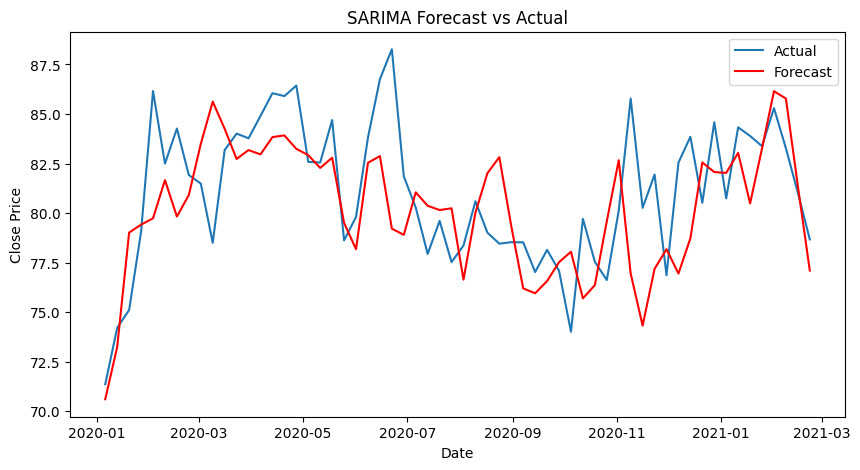

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, test_predictions, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('SARIMA Forecast vs Actual')
plt.legend()
plt.show()


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, test_predictions)
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

In [37]:
mae

2.4462008766851375

In [38]:
rmse

3.186033110323206

In [39]:
smape = np.mean(np.abs(test_predictions - y_test) / (np.abs(test_predictions) + np.abs(y_test)))

In [40]:
smape

0.015141245743217084

## Working with test data

In [41]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      100 non-null    int64         
 1   Date    100 non-null    datetime64[ns]
 2   Open    100 non-null    float64       
 3   Volume  100 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.2 KB


In [42]:
test_data.head()

,id,Date,Open,Volume
0,0,2021-03-01,72.708331,205897600
1,1,2021-03-08,73.310886,214095600
2,2,2021-03-15,70.610119,151601700
3,3,2021-03-22,70.256017,193982500
4,4,2021-03-29,68.258324,220238400


## Feature engineering of test_data

In [43]:
#EMA
test_data['Open_EMA'] = test_data['Open'].ewm(span = 7, adjust = False).mean()
test_data['Volume_EMA'] = test_data['Volume'].ewm(span = 7, adjust = False).mean()

In [44]:
#Lagged features


# Find only 1 lag value for Open prices as per above observations.
test_data[f'Open_Lag_1'] = test_data['Open'].shift(1)
test_data[f'Open_Lag_1'] = test_data[f'Open_Lag_1'].fillna(method='bfill')

# Find lag 1 and 2 for Volume according to the results given above.
test_data[f'Volume_Lag_1'] = test_data['Volume'].shift(1)
test_data[f'Volume_Lag_1'] = test_data[f'Volume_Lag_1'].fillna(method='bfill')


In [45]:
test_data['Open_rolling_mean'] = test_data['Open'].rolling(window=5, min_periods = 1).std()
test_data['Open_rolling_mean'] = test_data['Open'].fillna(method='bfill',limit=4)

In [46]:
test_data['Open_diff'] = test_data['Open'].diff()
test_data.at[test_data.index[0],'Open_diff'] = test_data['Open'][0]
test_data['Volume_diff'] = test_data['Volume'].diff()
test_data.at[test_data.index[0],'Volume_diff'] = test_data['Volume'][0]

In [47]:
test_data

,id,Date,Open,Volume,Open_EMA,Volume_EMA,Open_Lag_1,Volume_Lag_1,Open_rolling_mean,Open_diff,Volume_diff
0,0,2021-03-01,72.708331,205897600,72.708331,2.058976e+08,72.708331,205897600.0,72.708331,72.708331,205897600.0
1,1,2021-03-08,73.310886,214095600,72.858970,2.079471e+08,72.708331,205897600.0,73.310886,0.602555,8198000.0
2,2,2021-03-15,70.610119,151601700,72.296757,1.938608e+08,73.310886,214095600.0,70.610119,-2.700767,-62493900.0
3,3,2021-03-22,70.256017,193982500,71.786572,1.938912e+08,70.610119,151601700.0,70.256017,-0.354102,42380800.0
4,4,2021-03-29,68.258324,220238400,70.904510,2.004780e+08,70.256017,193982500.0,68.258324,-1.997693,26255900.0
...,...,...,...,...,...,...,...,...,...,...,...
95,95,2022-12-26,57.048622,224994700,57.063680,2.307424e+08,55.184092,291865900.0,57.048622,1.864530,-66871200.0
96,96,2023-01-02,60.569661,176020500,57.940175,2.170619e+08,57.048622,224994700.0,60.569661,3.521039,-48974200.0
97,97,2023-01-09,61.446777,181478600,58.816825,2.081661e+08,60.569661,176020500.0,61.446777,0.877116,5458100.0
98,98,2023-01-16,55.447711,162471700,57.974547,1.967425e+08,61.446777,181478600.0,55.447711,-5.999066,-19006900.0


In [48]:
test_features = test_data[['Open', 'Open_diff', 'Open_EMA', 'Open_rolling_mean']]
forecast_test = final_results.get_forecast(steps=len(test_data), exog=test_features).predicted_mean

In [49]:
forecast_test

2020-01-06    77.335591
2020-01-13    74.105183
2020-01-20    78.361969
2020-01-27    76.574199
2020-02-03    75.122968
                ...    
2021-11-01    60.353338
2021-11-08    58.392419
2021-11-15    60.445540
2021-11-22    64.756744
2021-11-29    63.582118
Freq: W-MON, Name: predicted_mean, Length: 100, dtype: float64

In [50]:
# # Assuming 'test_data' is your DataFrame and 'forecasted_close_prices' is your Series of forecasted close prices
# forecasted_close_prices = pd.Series(forecast_test)

# # Convert the index of forecasted_close_prices to datetime
# forecasted_close_prices.index = pd.to_datetime(forecasted_close_prices.index)

# # Include forecasted close prices in test_data
# test_data['forecasted_close_prices'] = forecasted_close_prices

# # Now, your test_data DataFrame has a new column 'forecasted_close_prices' with the forecasted close prices


In [51]:
test_data

,id,Date,Open,Volume,Open_EMA,Volume_EMA,Open_Lag_1,Volume_Lag_1,Open_rolling_mean,Open_diff,Volume_diff
0,0,2021-03-01,72.708331,205897600,72.708331,2.058976e+08,72.708331,205897600.0,72.708331,72.708331,205897600.0
1,1,2021-03-08,73.310886,214095600,72.858970,2.079471e+08,72.708331,205897600.0,73.310886,0.602555,8198000.0
2,2,2021-03-15,70.610119,151601700,72.296757,1.938608e+08,73.310886,214095600.0,70.610119,-2.700767,-62493900.0
3,3,2021-03-22,70.256017,193982500,71.786572,1.938912e+08,70.610119,151601700.0,70.256017,-0.354102,42380800.0
4,4,2021-03-29,68.258324,220238400,70.904510,2.004780e+08,70.256017,193982500.0,68.258324,-1.997693,26255900.0
...,...,...,...,...,...,...,...,...,...,...,...
95,95,2022-12-26,57.048622,224994700,57.063680,2.307424e+08,55.184092,291865900.0,57.048622,1.864530,-66871200.0
96,96,2023-01-02,60.569661,176020500,57.940175,2.170619e+08,57.048622,224994700.0,60.569661,3.521039,-48974200.0
97,97,2023-01-09,61.446777,181478600,58.816825,2.081661e+08,60.569661,176020500.0,61.446777,0.877116,5458100.0
98,98,2023-01-16,55.447711,162471700,57.974547,1.967425e+08,61.446777,181478600.0,55.447711,-5.999066,-19006900.0


In [52]:
test_data['Close'] = forecast_test.values

In [53]:
test_data

,id,Date,Open,Volume,Open_EMA,Volume_EMA,Open_Lag_1,Volume_Lag_1,Open_rolling_mean,Open_diff,Volume_diff,Close
0,0,2021-03-01,72.708331,205897600,72.708331,2.058976e+08,72.708331,205897600.0,72.708331,72.708331,205897600.0,77.335591
1,1,2021-03-08,73.310886,214095600,72.858970,2.079471e+08,72.708331,205897600.0,73.310886,0.602555,8198000.0,74.105183
2,2,2021-03-15,70.610119,151601700,72.296757,1.938608e+08,73.310886,214095600.0,70.610119,-2.700767,-62493900.0,78.361969
3,3,2021-03-22,70.256017,193982500,71.786572,1.938912e+08,70.610119,151601700.0,70.256017,-0.354102,42380800.0,76.574199
4,4,2021-03-29,68.258324,220238400,70.904510,2.004780e+08,70.256017,193982500.0,68.258324,-1.997693,26255900.0,75.122968
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,2022-12-26,57.048622,224994700,57.063680,2.307424e+08,55.184092,291865900.0,57.048622,1.864530,-66871200.0,60.353338
96,96,2023-01-02,60.569661,176020500,57.940175,2.170619e+08,57.048622,224994700.0,60.569661,3.521039,-48974200.0,58.392419
97,97,2023-01-09,61.446777,181478600,58.816825,2.081661e+08,60.569661,176020500.0,61.446777,0.877116,5458100.0,60.445540
98,98,2023-01-16,55.447711,162471700,57.974547,1.967425e+08,61.446777,181478600.0,55.447711,-5.999066,-19006900.0,64.756744


## Predicting Strategy using Classification

In [54]:
for lag in range(1, 6):  # Adjust the number of lags as needed
    train_data[f'close_lag_{lag}'] = train_data['Close'].shift(lag)

train_data['weekly_return'] = train_data['Close'].pct_change()

train_data['week_avg_volume'] = train_data['Volume'].rolling(window=2).mean()
train_data['volume_rate_of_change'] = train_data['Volume'].pct_change()

train_data['rolling_std_10'] = train_data['Close'].rolling(window=10).std()

def calculate_rsi(data, period=14):
    delta = data.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

train_data['rsi'] = calculate_rsi(train_data['Close'], period=14)

In [55]:
train_data['close_lag_1'] = train_data['close_lag_1'].fillna(method='bfill',limit=1)
train_data['close_lag_2'] = train_data['close_lag_2'].fillna(method='bfill',limit=2)
train_data['close_lag_3'] = train_data['close_lag_3'].fillna(method='bfill',limit=3)
train_data['close_lag_4'] = train_data['close_lag_4'].fillna(method='bfill',limit=4)
train_data['close_lag_5'] = train_data['close_lag_5'].fillna(method='bfill',limit=5)
train_data['weekly_return'] = train_data['weekly_return'].fillna(method='bfill',limit=1)
train_data['volume_rate_of_change'] = train_data['volume_rate_of_change'].fillna(method='bfill',limit=1)
train_data['rolling_std_10'] = train_data['rolling_std_10'].fillna(method='bfill',limit=8)
train_data['week_avg_volume'] = train_data['week_avg_volume'].fillna(method='bfill',limit=1)
train_data['rsi'] = train_data['rsi'].fillna(method='bfill',limit=13)

train_data.head()

,id,Open,Close,Volume,Strategy,Open_EMA,Volume_EMA,Open_Lag_1,Volume_Lag_1,Open_rolling_mean,...,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5,weekly_return,week_avg_volume,volume_rate_of_change,rolling_std_10,rsi
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-01,0,66.208486,75.609978,298506300,Hold,66.208486,2.985063e+08,66.208486,298506300.0,66.208486,...,75.609978,75.609978,75.609978,75.609978,75.609978,-0.015430,263240550.0,-0.236281,NaN,20.64578
2015-06-08,1,64.116235,74.443331,227974800,Hold,65.685423,2.808734e+08,66.208486,298506300.0,64.116235,...,75.609978,75.609978,75.609978,75.609978,75.609978,-0.015430,263240550.0,-0.236281,8.634203,20.64578
2015-06-15,2,47.701942,71.140831,250670900,Buy,61.189553,2.733228e+08,64.116235,227974800.0,47.701942,...,74.443331,75.609978,75.609978,75.609978,75.609978,-0.044363,239322850.0,0.099555,8.634203,20.64578
2015-06-22,3,54.754816,72.881344,223614300,Hold,59.580869,2.608957e+08,47.701942,250670900.0,54.754816,...,71.140831,74.443331,75.609978,75.609978,75.609978,0.024466,237142600.0,-0.107937,8.634203,20.64578
2015-06-29,4,48.031899,66.284718,406814900,Buy,56.693626,2.973755e+08,54.754816,223614300.0,48.031899,...,72.881344,71.140831,74.443331,75.609978,75.609978,-0.090512,315214600.0,0.819271,8.634203,20.64578


In [56]:
train_data

,id,Open,Close,Volume,Strategy,Open_EMA,Volume_EMA,Open_Lag_1,Volume_Lag_1,Open_rolling_mean,...,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5,weekly_return,week_avg_volume,volume_rate_of_change,rolling_std_10,rsi
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-01,0,66.208486,75.609978,298506300,Hold,66.208486,2.985063e+08,66.208486,298506300.0,66.208486,...,75.609978,75.609978,75.609978,75.609978,75.609978,-0.015430,263240550.0,-0.236281,NaN,20.645780
2015-06-08,1,64.116235,74.443331,227974800,Hold,65.685423,2.808734e+08,66.208486,298506300.0,64.116235,...,75.609978,75.609978,75.609978,75.609978,75.609978,-0.015430,263240550.0,-0.236281,8.634203,20.645780
2015-06-15,2,47.701942,71.140831,250670900,Buy,61.189553,2.733228e+08,64.116235,227974800.0,47.701942,...,74.443331,75.609978,75.609978,75.609978,75.609978,-0.044363,239322850.0,0.099555,8.634203,20.645780
2015-06-22,3,54.754816,72.881344,223614300,Hold,59.580869,2.608957e+08,47.701942,250670900.0,54.754816,...,71.140831,74.443331,75.609978,75.609978,75.609978,0.024466,237142600.0,-0.107937,8.634203,20.645780
2015-06-29,4,48.031899,66.284718,406814900,Buy,56.693626,2.973755e+08,54.754816,223614300.0,48.031899,...,72.881344,71.140831,74.443331,75.609978,75.609978,-0.090512,315214600.0,0.819271,8.634203,20.645780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,295,81.284821,83.373498,117281600,Sell,80.318683,1.517246e+08,80.663736,127248000.0,81.284821,...,83.889750,84.324399,80.740975,84.583433,80.519224,-0.006154,122264800.0,-0.078323,2.372765,56.466357
2021-02-01,296,71.970249,85.294903,177655800,Sell,78.231575,1.582074e+08,81.284821,117281600.0,71.970249,...,83.373498,83.889750,84.324399,80.740975,84.583433,0.023046,147468700.0,0.514780,2.552423,59.405130
2021-02-08,297,71.784627,83.266453,146003500,Hold,76.619838,1.551564e+08,71.970249,177655800.0,71.784627,...,85.294903,83.373498,83.889750,84.324399,80.740975,-0.023782,161829650.0,-0.178166,1.568775,53.522191


## For test data

In [57]:
for lag in range(1, 6):  # Adjust the number of lags as needed
    test_data[f'close_lag_{lag}'] = test_data['Close'].shift(lag)

test_data['weekly_return'] = test_data['Close'].pct_change()

test_data['week_avg_volume'] = test_data['Volume'].rolling(window=2).mean()
test_data['volume_rate_of_change'] = test_data['Volume'].pct_change()

test_data['rolling_std_10'] = test_data['Close'].rolling(window=10).std()


def calculate_rsi(data, period=14):
    delta = data.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

test_data['rsi'] = calculate_rsi(test_data['Close'], period=14)


In [58]:
test_data

,id,Date,Open,Volume,Open_EMA,Volume_EMA,Open_Lag_1,Volume_Lag_1,Open_rolling_mean,Open_diff,...,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5,weekly_return,week_avg_volume,volume_rate_of_change,rolling_std_10,rsi
0,0,2021-03-01,72.708331,205897600,72.708331,2.058976e+08,72.708331,205897600.0,72.708331,72.708331,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2021-03-08,73.310886,214095600,72.858970,2.079471e+08,72.708331,205897600.0,73.310886,0.602555,...,77.335591,NaN,NaN,NaN,NaN,-0.041771,209996600.0,0.039816,NaN,NaN
2,2,2021-03-15,70.610119,151601700,72.296757,1.938608e+08,73.310886,214095600.0,70.610119,-2.700767,...,74.105183,77.335591,NaN,NaN,NaN,0.057442,182848650.0,-0.291897,NaN,NaN
3,3,2021-03-22,70.256017,193982500,71.786572,1.938912e+08,70.610119,151601700.0,70.256017,-0.354102,...,78.361969,74.105183,77.335591,NaN,NaN,-0.022814,172792100.0,0.279554,NaN,NaN
4,4,2021-03-29,68.258324,220238400,70.904510,2.004780e+08,70.256017,193982500.0,68.258324,-1.997693,...,76.574199,78.361969,74.105183,77.335591,NaN,-0.018952,207110450.0,0.135352,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,2022-12-26,57.048622,224994700,57.063680,2.307424e+08,55.184092,291865900.0,57.048622,1.864530,...,60.212545,57.101369,58.702307,63.548661,60.694940,0.002338,258430300.0,-0.229116,2.929008,32.662067
96,96,2023-01-02,60.569661,176020500,57.940175,2.170619e+08,57.048622,224994700.0,60.569661,3.521039,...,60.353338,60.212545,57.101369,58.702307,63.548661,-0.032491,200507600.0,-0.217668,2.588437,33.137748
97,97,2023-01-09,61.446777,181478600,58.816825,2.081661e+08,60.569661,176020500.0,61.446777,0.877116,...,58.392419,60.353338,60.212545,57.101369,58.702307,0.035161,178749550.0,0.031008,1.870422,42.983974
98,98,2023-01-16,55.447711,162471700,57.974547,1.967425e+08,61.446777,181478600.0,55.447711,-5.999066,...,60.445540,58.392419,60.353338,60.212545,57.101369,0.071324,171975150.0,-0.104734,2.280970,50.939329


In [59]:
test_data['close_lag_1'] = test_data['close_lag_1'].fillna(method='bfill',limit=1)
test_data['close_lag_2'] = test_data['close_lag_2'].fillna(method='bfill',limit=2)
test_data['close_lag_3'] = test_data['close_lag_3'].fillna(method='bfill',limit=3)
test_data['close_lag_4'] = test_data['close_lag_4'].fillna(method='bfill',limit=4)
test_data['close_lag_5'] = test_data['close_lag_5'].fillna(method='bfill',limit=5)
test_data['weekly_return'] = test_data['weekly_return'].fillna(method='bfill',limit=1)
test_data['volume_rate_of_change'] = test_data['volume_rate_of_change'].fillna(method='bfill',limit=1)
test_data['rolling_std_10'] = test_data['rolling_std_10'].fillna(method='bfill',limit=8)
test_data['week_avg_volume'] = test_data['week_avg_volume'].fillna(method='bfill',limit=1)
test_data['rsi'] = test_data['rsi'].fillna(method='bfill',limit=13)

test_data.head()

,id,Date,Open,Volume,Open_EMA,Volume_EMA,Open_Lag_1,Volume_Lag_1,Open_rolling_mean,Open_diff,...,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5,weekly_return,week_avg_volume,volume_rate_of_change,rolling_std_10,rsi
0,0,2021-03-01,72.708331,205897600,72.708331,2.058976e+08,72.708331,205897600.0,72.708331,72.708331,...,77.335591,77.335591,77.335591,77.335591,77.335591,-0.041771,209996600.0,0.039816,NaN,43.57909
1,1,2021-03-08,73.310886,214095600,72.858970,2.079471e+08,72.708331,205897600.0,73.310886,0.602555,...,77.335591,77.335591,77.335591,77.335591,77.335591,-0.041771,209996600.0,0.039816,1.872761,43.57909
2,2,2021-03-15,70.610119,151601700,72.296757,1.938608e+08,73.310886,214095600.0,70.610119,-2.700767,...,74.105183,77.335591,77.335591,77.335591,77.335591,0.057442,182848650.0,-0.291897,1.872761,43.57909
3,3,2021-03-22,70.256017,193982500,71.786572,1.938912e+08,70.610119,151601700.0,70.256017,-0.354102,...,78.361969,74.105183,77.335591,77.335591,77.335591,-0.022814,172792100.0,0.279554,1.872761,43.57909
4,4,2021-03-29,68.258324,220238400,70.904510,2.004780e+08,70.256017,193982500.0,68.258324,-1.997693,...,76.574199,78.361969,74.105183,77.335591,77.335591,-0.018952,207110450.0,0.135352,1.872761,43.57909


In [60]:
X = train_data.reset_index()[['id','Open','Close','Volume','Open_diff','Volume_diff','Open_Lag_1','Volume_Lag_1','Open_EMA','close_lag_1','close_lag_2','close_lag_3','close_lag_4','close_lag_5','weekly_return','volume_rate_of_change','rolling_std_10','week_avg_volume','rsi']]
y = train_data['Strategy']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X = train_data.reset_index()[['id','Open','Close','Volume','Open_diff','Volume_diff','Open_Lag_1','Volume_Lag_1','Open_EMA','close_lag_1','close_lag_2','close_lag_3','close_lag_4','close_lag_5','weekly_return','volume_rate_of_change','rolling_std_10','week_avg_volume','rsi']]
y = train_data['Strategy']
clf = XGBClassifier()
y_encoded = y.map({'Buy': 0, 'Hold': 1, 'Sell': 2})
y_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

clf.fit(X_train,y_train)

test_x = test_data.reset_index()[['id','Open','Close','Volume','Open_diff','Volume_diff','Open_Lag_1','Volume_Lag_1','Open_EMA','close_lag_1','close_lag_2','close_lag_3','close_lag_4','close_lag_5','weekly_return','volume_rate_of_change','rolling_std_10','week_avg_volume','rsi']]
y_pred = clf.predict(X_test)
#y_test_pred_encoded
prediction_mapping = {0: 'Buy', 1: 'Hold', 2: 'Sell'}

# Use NumPy array indexing to map the numerical predictions to labels
y_test_pred = [prediction_mapping[prediction] for prediction in y_pred]


In [63]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 73.33%


In [64]:
# test_data['Strategy'] = y_pred

In [65]:
# submission = pd.DataFrame()
# submission['id'] = test_data['id']
# submission["Date"] = test_data["Date"]

In [66]:
# sample_submission = pd.read_csv('/kaggle/input/ue21cs342aa2/sample_submission.csv')

In [67]:
# submission["Close"] =test_data["Close"]
# submission["Strategy"] = test_data["Strategy"]

In [68]:
# submission.head()

In [69]:
# submission.to_csv('submission.csv', index=True)